In [115]:
## import data from a csv file

import pandas as pd
import matplotlib.pyplot as plt
import ast

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

file = "C:\\Users\\aksha\\data_analysis_job_market\\dataset\\data_jobs.csv"
df = pd.read_csv(file)

# 1.clean the data by converting the job_posted_date into a datetime object from a string

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df[['job_title_short','job_skills']].head(10)


,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,"['r', 'python', 'sql', 'nosql', 'power bi', 't..."
2,Data Engineer,"['python', 'sql', 'c#', 'azure', 'airflow', 'd..."
3,Data Engineer,"['python', 'c++', 'java', 'matlab', 'aws', 'te..."
4,Data Engineer,"['bash', 'python', 'oracle', 'aws', 'ansible',..."
5,Data Engineer,"['python', 'sql', 'gcp']"
6,Senior Data Engineer,"['sql', 'python', 'java', 'sql server', 'gcp',..."
7,Data Engineer,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu..."
8,Business Analyst,"['excel', 'powerpoint', 'power bi']"
9,Data Scientist,"['sql', 'python', 'r', 'mongodb', 'mongodb', '..."


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [117]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [118]:
df_exploded = df.explode('job_skills')
print(df_exploded[['job_title_short','job_skills']].head(20))

        job_title_short  job_skills
0  Senior Data Engineer         NaN
1          Data Analyst           r
1          Data Analyst      python
1          Data Analyst         sql
1          Data Analyst       nosql
1          Data Analyst    power bi
1          Data Analyst     tableau
2         Data Engineer      python
2         Data Engineer         sql
2         Data Engineer          c#
2         Data Engineer       azure
2         Data Engineer     airflow
2         Data Engineer         dax
2         Data Engineer      docker
2         Data Engineer  kubernetes
2         Data Engineer     jenkins
3         Data Engineer      python
3         Data Engineer         c++
3         Data Engineer        java
3         Data Engineer      matlab


In [119]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
print(skills_count)

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64


In [120]:
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count',ascending = False)


In [121]:
job_name = 'Data Analyst'
number_of_topskills =10

df_with_top_skills = df_skills_count[df_skills_count['job_title_short']==job_name].sort_values(by='skill_count',ascending=False).head(number_of_topskills)
print(df_with_top_skills)

    job_title_short  job_skills  skill_count
625    Data Analyst         sql        92428
494    Data Analyst       excel        66860
590    Data Analyst      python        57190
638    Data Analyst     tableau        46455
583    Data Analyst    power bi        39380
594    Data Analyst           r        29996
606    Data Analyst         sas        27998
585    Data Analyst  powerpoint        13822
664    Data Analyst        word        13562
605    Data Analyst         sap        11280


Text(0, 0.5, 'Top skills')

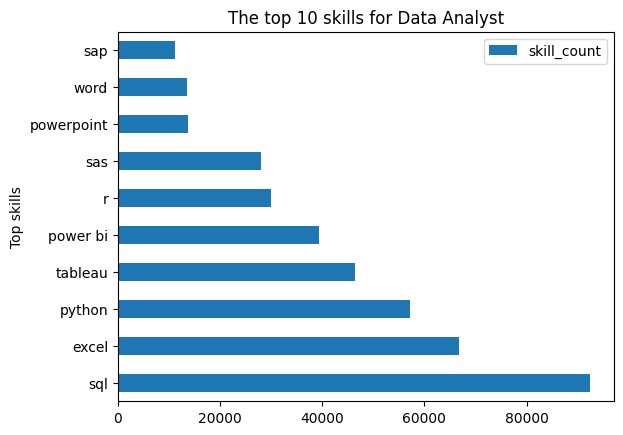

In [127]:
df_with_top_skills.plot(x='job_skills',kind='barh')
plt.title(f'The top {number_of_topskills} skills for {job_name}')
plt.ylabel('Top skills')